#IMPORTING DATASET

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Importing libraries


In [47]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


#**Data preprocessing**

# Training Image preprocessing

In [48]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_vegitable_recognition_system/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 3115 files belonging to 36 classes.


# Validation image preprocessing

In [49]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_vegitable_recognition_system/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64,64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 351 files belonging to 36 classes.


# Building model

In [50]:
cnn = tf.keras.models.Sequential()

# Building Convolution Layer

In [51]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))


In [52]:
cnn.add(tf.keras.layers.Dropout(0.25)) #to avoid overfitting

In [53]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [54]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [55]:
cnn.add(tf.keras.layers.Flatten())

In [56]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [57]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [58]:
cnn.add(tf.keras.layers.Dropout(0.5)) #dropping nuerons to avoid overfitting

In [59]:
#output layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

# Compilation and training phase

In [60]:
cnn.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [61]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 64, 64, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 31, 31, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        36928     
                                                      

In [62]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 [==============================] - 160s 2s/step - loss: 7.6249 - accuracy: 0.0421 - val_loss: 3.5132 - val_accuracy: 0.0741
Epoch 2/32
98/98 [==============================] - 164s 2s/step - loss: 3.6305 - accuracy: 0.0510 - val_loss: 3.5060 - val_accuracy: 0.0883
Epoch 3/32
98/98 [==============================] - 157s 2s/step - loss: 3.4100 - accuracy: 0.0770 - val_loss: 3.1177 - val_accuracy: 0.1567
Epoch 4/32
98/98 [==============================] - 151s 1s/step - loss: 3.1512 - accuracy: 0.1223 - val_loss: 2.7277 - val_accuracy: 0.2707
Epoch 5/32
98/98 [==============================] - 157s 2s/step - loss: 2.8362 - accuracy: 0.2080 - val_loss: 1.8656 - val_accuracy: 0.5470
Epoch 6/32
98/98 [==============================] - 156s 1s/step - loss: 2.4485 - accuracy: 0.3079 - val_loss: 1.5027 - val_accuracy: 0.6781
Epoch 7/32
98/98 [==============================] - 158s 2s/step - loss: 2.0871 - accuracy: 0.4212 - val_loss: 1.0836 - val_accuracy: 0.7550
Epoch 8/32
98

# Saving Model

In [63]:
cnn.save('trained_model.h5')

In [64]:
training_history.history

{'loss': [7.624949932098389,
  3.6304609775543213,
  3.409950017929077,
  3.15122652053833,
  2.8361785411834717,
  2.448453426361084,
  2.0871284008026123,
  1.640575647354126,
  1.2975116968154907,
  0.9837483763694763,
  0.8060400485992432,
  0.6582009196281433,
  0.6037794947624207,
  0.5058326721191406,
  0.456341028213501,
  0.41030770540237427,
  0.3966698944568634,
  0.43270164728164673,
  0.34620025753974915,
  0.2671421766281128,
  0.33933714032173157,
  0.2730906307697296,
  0.3130248486995697,
  0.26538848876953125,
  0.27945300936698914,
  0.27837151288986206,
  0.25773781538009644,
  0.2666424810886383,
  0.2645367383956909,
  0.2860713005065918,
  0.2294202744960785,
  0.27065014839172363],
 'accuracy': [0.04205457493662834,
  0.05104333907365799,
  0.07704655081033707,
  0.12231139838695526,
  0.20802567899227142,
  0.307865172624588,
  0.42118778824806213,
  0.5271267890930176,
  0.6221508979797363,
  0.7184590697288513,
  0.7765650153160095,
  0.8009631037712097,
  0.

In [65]:
#recording history
import json
with open('trained_hist.json','w') as f:
  json.dump(training_history.history,f)

In [67]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Calculating Accuracy of Model Achived on Validation Set

In [68]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 96.86609506607056 %


# Accuracy Visualisation

# Training Visualisation

In [69]:
training_history.history['accuracy']

[0.04205457493662834,
 0.05104333907365799,
 0.07704655081033707,
 0.12231139838695526,
 0.20802567899227142,
 0.307865172624588,
 0.42118778824806213,
 0.5271267890930176,
 0.6221508979797363,
 0.7184590697288513,
 0.7765650153160095,
 0.8009631037712097,
 0.8269662857055664,
 0.8597110509872437,
 0.8869984149932861,
 0.8959871530532837,
 0.9033707976341248,
 0.9008025527000427,
 0.9097913503646851,
 0.9287319183349609,
 0.9194221496582031,
 0.9412519931793213,
 0.932584285736084,
 0.9380417466163635,
 0.942215085029602,
 0.938683807849884,
 0.9431781768798828,
 0.938683807849884,
 0.9438202381134033,
 0.9434992074966431,
 0.9495987296104431,
 0.9396468997001648]

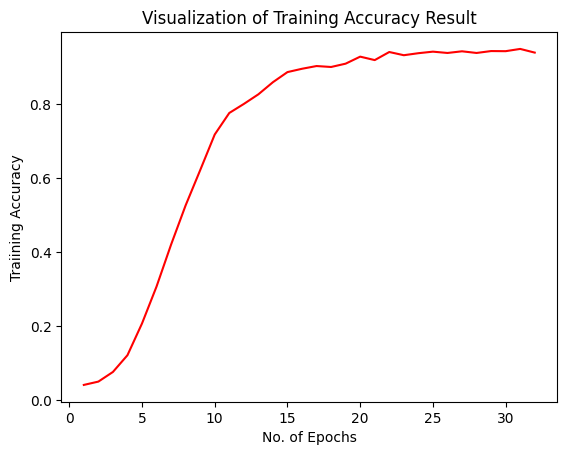

In [70]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

# validation Acccuracy

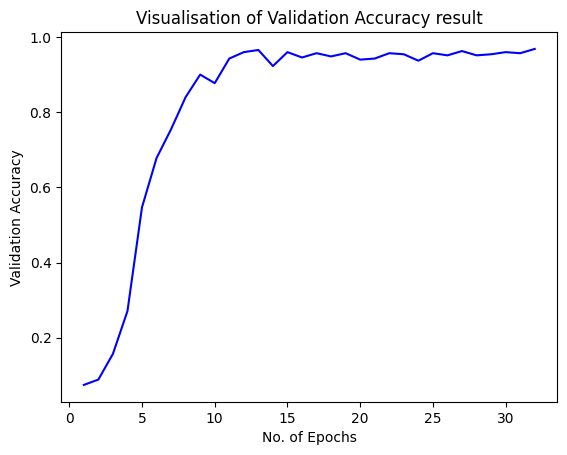

In [71]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualisation of Validation Accuracy result')
plt.show()